# TP Programming with Keras - MNIST problem

In this session, we build a neural network to solve the classification problem in the MNIST situation, by using the Tensorflow/Keras libraries. MNIST is a database with handwritten digits images.

We will proceed in three steps. Firstly, we develop a simple fully-connected neural network, with no specific features. Then, we apply regularization procedures and we use a validation set, to improve generalization performances. Finally, we implement a Convolutional Neural Network.

In this practice session, some cells must be filled according to the instructions. They are identified by the word **Exercise**. You will perform the **Verifications** yourselves in most cases, by watching if the algorithm correctly works and converges.

Below we import the required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras

## Data definition

The following cell loads the MNIST data

In [3]:
#DO NOT CHANGE

(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

**Exercise**: Visualize X_train data by using plt.imshow.

Randomly selected index: 27514


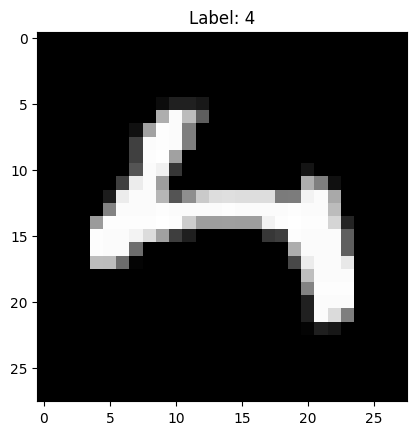

In [14]:
#TO DO
i = np.random.randint(0, X_train.shape[0])
print(f"Randomly selected index: {i}")
plt.imshow(X_train[i], cmap='gray')
plt.title(f"Label: {Y_train[i]}")
plt.show()

**Verification**: Digits images should appear.

**Exercise**: Print the input and output dimensions. Print also in a table format the first input example, and the first five output data.

In [15]:
input_dimensions = (X_train.shape[1],X_train.shape[2])
output_dimensions = 10
one_hot_encoder = keras.utils.to_categorical


print(f"Input dimensions: {input_dimensions}, Output dimensions: {output_dimensions}")

# Print also in a table format the first input example, and the first five output data.
print("First input example_compact:")
print(X_train[0].reshape(-1))
print(X_train[:5])
print("First five output data:")
print(one_hot_encoder(Y_train, num_classes=output_dimensions)[:5])

Input dimensions: (28, 28), Output dimensions: 10
First input example_compact:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0 

### Formatting the input data

**Exercise**: You can see that input data consist in table with integers between 0 and 255. These numbers are relatively high to handle for a neural network: it can cause numerical instabilities by computing the gradients. In order to avoid these instabilities, we should use data with an order of magnitude close to 1.
To do so, we simply normalize the data by dividing by 255 (maximal pixel intensity). Complete the following cell to perform this normalization on X_train and X_test.

In [ ]:
X_train = X_train / 255.0

X_test = X_test / 255.0

### Formatting the output data

**Exercise**: You can notice that the output data correspond to the digit on the image (an integer between 0 and 9). To define a classification problem, we must define binary classes, whose value is 0 or 1 (with the expected number of classes). For instance, the digit 5 will be encoded by the vector [0,0,0,0,0,1,0,0,0,0].

To do so, you can use the keras function "keras keras.utils.to_categorical", by indicating the vector to process and the number of classes (keyword "num_classes"). Apply this function for Y_train and Y_test.

In [22]:
Y_train_cat = one_hot_encoder(Y_train, num_classes=output_dimensions)

Y_test_cat = one_hot_encoder(Y_test, num_classes=output_dimensions)

## Simple Keras model

### Model creation

**Exercise**: Create a Keras model with name "my_model".

**Specific instructions**: 
- The first layer must be a Flatten layer, with input_shape corresponding to the input data dimension. This layers flattens the data so that they are represented by a 1D vector: a Multilayer Perceptron indeed takes classically vectors as input. There is no need to precise other variables than the input data.
- We perform an exclusive classification: there is only one digit on each image. The last layer must use a softmax activation function. Use the right number of neurons for the last layer.
- Use 2 ou 3 hidden layers, a hundred of neurons and ReLU activations functions. You are free for the global architecture!

In [41]:
#TO DO

model = keras.Sequential()

model.add(keras.layers.InputLayer(shape=input_dimensions))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(output_dimensions, activation='softmax'))

**Exercise**: Display your architecture by calling my_model.summary()

In [42]:
#TO DO

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model compilation

**Exercise**: Compile your model, you can choose your optimizer.

**Specific instructions**:
- For the loss function, the "categorical_crossentropy" is adapted for exclusive classification problems.
- The relevant metric is "categorical_accuracy"

In [43]:
#TO DO

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
initial_weights = model.get_weights()



### Training

**Exercise**: Run the training. Pay attention to use Y_train_cat as output data. Store the history of your training so that we can plot the evolution of the loss and the accuracy at the end of the training procedure.

In [44]:
#keep track of val_loss_such that early stopping can be implemented
# stop training if val_loss doesn't improve for 2 consecutive epochs
# reinitialize model weights by cloning the architecture and compiling a fresh instance

model.set_weights(initial_weights)

percentage_validation = 0.2
validation_size = int(percentage_validation * X_train.shape[0])

validation_indices = np.random.choice(X_train.shape[0], size=validation_size, replace=False)
X_validation = X_train[validation_indices]
Y_validation_cat = Y_train_cat[validation_indices]

X_train_partial = np.delete(X_train, validation_indices, axis=0)
Y_train_partial_cat = np.delete(Y_train_cat, validation_indices, axis=0)

learning = model.fit(X_train_partial, 
                     Y_train_partial_cat,
                     validation_data=(X_validation, Y_validation_cat),
                     epochs=50,
                     batch_size=64,
                     shuffle=True)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - categorical_accuracy: 0.6159 - loss: 1.3918 - val_categorical_accuracy: 0.8992 - val_loss: 0.3699
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9039 - loss: 0.3445 - val_categorical_accuracy: 0.9214 - val_loss: 0.2760
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9242 - loss: 0.2665 - val_categorical_accuracy: 0.9337 - val_loss: 0.2351
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9367 - loss: 0.2274 - val_categorical_accuracy: 0.9404 - val_loss: 0.2092
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - categorical_accuracy: 0.9437 - loss: 0.2004 - val_categorical_accuracy: 0.9464 - val_loss: 0.1886
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9486 - loss: 0.1796 - val_categorical_accuracy: 0.9508 - val_loss: 0.1753
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.9520 - los

**Verification**: The loss function should decrease and the accuracy should increase.

**Exercise**: Plot the evolution of the loss function, and the evolution of the accuracy.

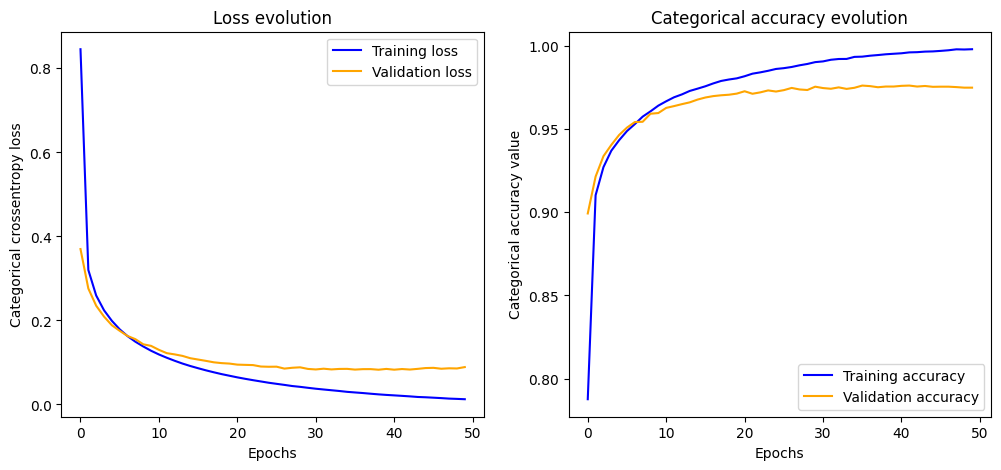

In [45]:
#TO DO

loss_evolution = learning.history['loss']
val_loss_evolution = learning.history['val_loss']
acc_evolution = learning.history['categorical_accuracy']
val_acc_evolution = learning.history['val_categorical_accuracy']

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(loss_evolution, color='blue', label='Training loss')
plt.plot(val_loss_evolution, color='orange', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Categorical crossentropy loss")
plt.title("Loss evolution")
plt.legend()
plt.subplot(122)
plt.plot(acc_evolution, color='blue', label='Training accuracy')
plt.plot(val_acc_evolution, color='orange', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Categorical accuracy value")
plt.title("Categorical accuracy evolution")
plt.legend()
plt.show()


### Predicting with your model

**Exercise**: Run the prediction on the test set

In [47]:
#TO DO

Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Exercise**: Extract the predicted labels, that corresponds to the classes with highest predicted probabilities. The function np.argmax (with the right "axis") will be useful.

In [48]:
#TO DO
Y_pred_asLabels = np.argmax(Y_pred, axis=1)

**Exercise**: Compute the accuracy on the test set.

In [49]:
#TO DO
accuracy = np.sum(Y_pred_asLabels == Y_test) / Y_test.shape[0]
print(f"Test set accuracy: {accuracy*100:.2f}%")

Test set accuracy: 97.62%


The following cell displays randomly some of the test examples and the associated predictions.

Text(0, 0.5, 'Network output')

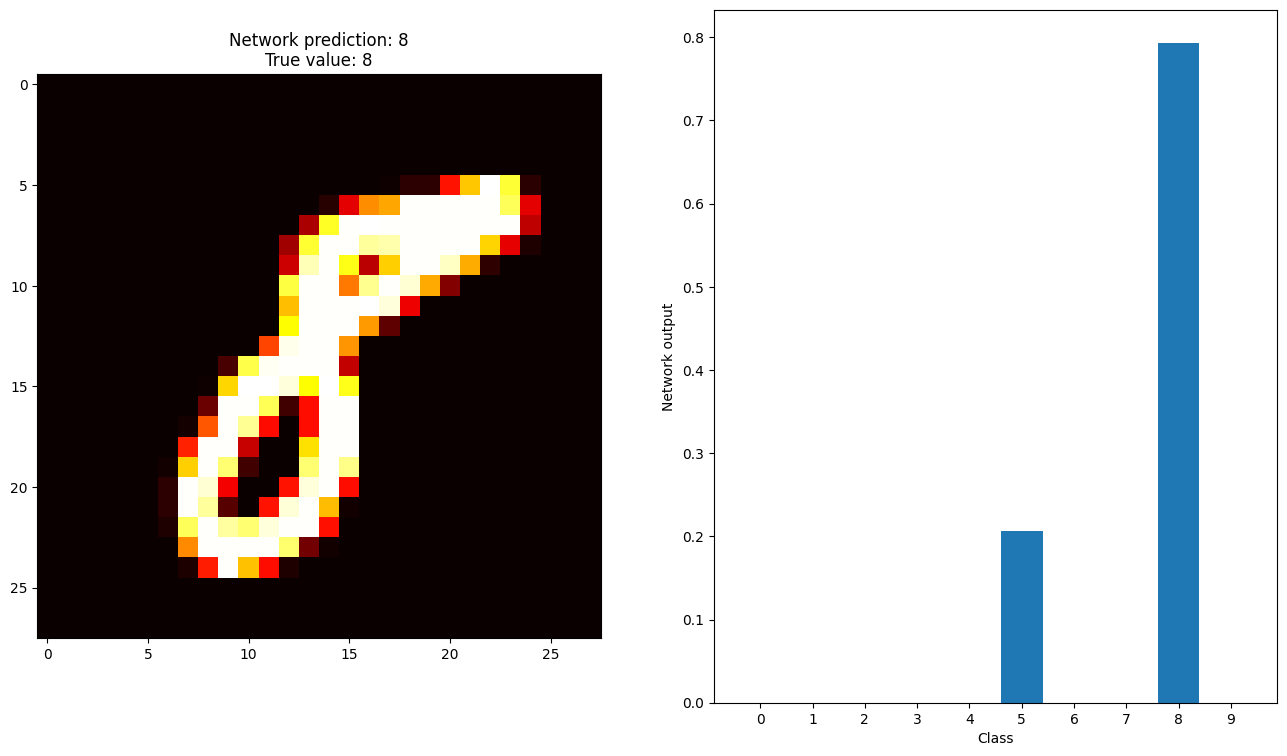

In [56]:
r = np.random.randint(X_test.shape[0])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Network prediction: " + str(Y_pred_asLabels[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


**Exercise**: Adapt the previous code to displays random wrong predictions of the network. The function np.where should be useful.

Number of wrong predictions: 238


Text(0, 0.5, 'Network output')

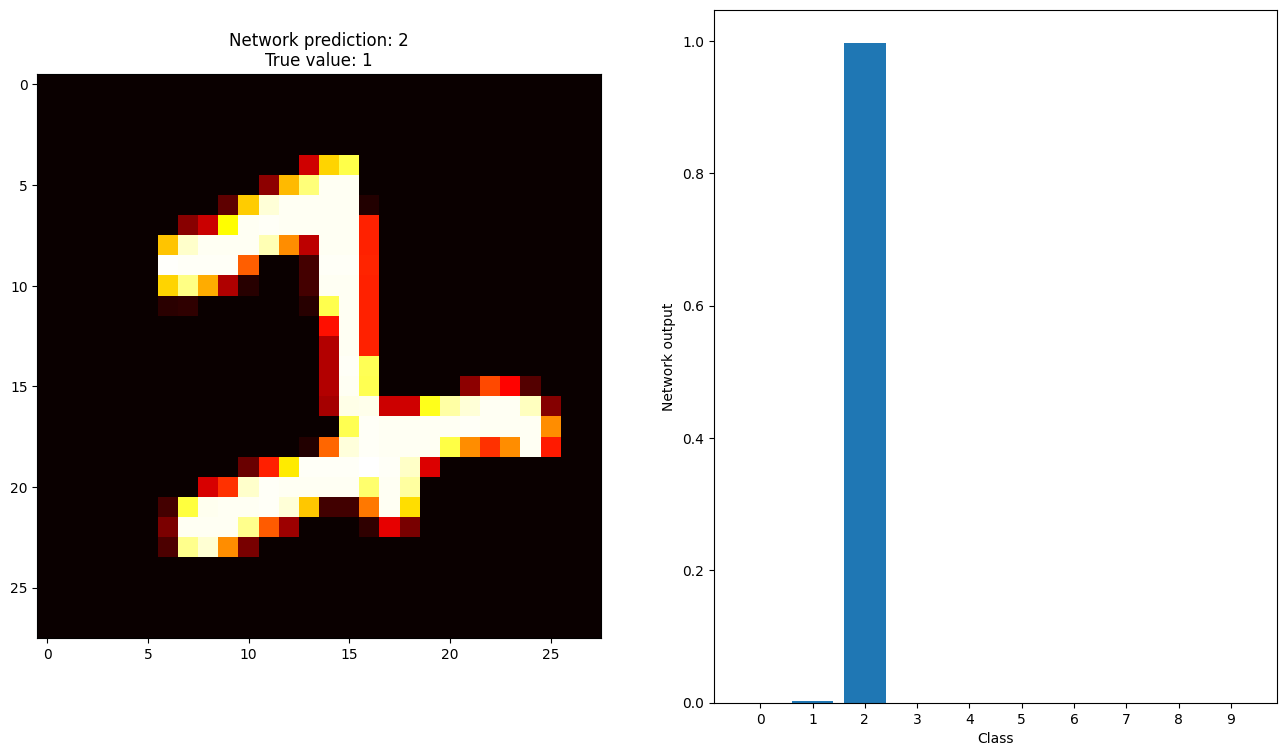

In [59]:
#TO DO
wrong_predictions = np.where(Y_pred_asLabels != Y_test)[0]
print(f"Number of wrong predictions: {len(wrong_predictions)}")

rand_wrong_index = np.random.choice(wrong_predictions)
r = rand_wrong_index

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Network prediction: " + str(Y_pred_asLabels[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


## Keras model with regularization

We add more advanced functionalities, related to the regularization, batchnormalization, validation set, early stopping.

### Model creation with regularizers

**Exercise**: Create a Keras model with name "my_model".

**Specific instructions**: 
- The first layer must be a Flatten layer, with the right input_shape
- Pay attention to the last layer (number of neurons, activation function)
- Use a batchnormalization layer between each Dense layer: keras.layers.Batchnormalization. There is no need to indicate any argument for this function. Do not use it as output layer.
- Use a Dropout layer after each batchnormalization layer: keras.layers.Dropout. You must indicate the Dropout rate (between 0 and 1). Try a number of about 0.1 for instance. Do not use this type of layer for the last layer.
- For each Dense layer, add a regularization. Use the keyword "kernel_regularizer" for each Dense layer and indicate keras.regularizers.l2(1e-3). 1e-3 corresponds to the regularization parameter.

In [65]:
#TO DO

model = keras.Sequential()

model.add(keras.layers.InputLayer(shape=input_dimensions))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer= keras.regularizers.l2(1e-3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer= keras.regularizers.l2(1e-3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(output_dimensions, activation='softmax', kernel_regularizer= keras.regularizers.l2(1e-3)))

**Exercise**: Display your architecture by calling my_model.summary()

In [66]:
#TO DO
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,306 (466.04 KB)

 Trainable params: 118,794 (464.04 KB)

 Non-trainable params: 512 (2.00 KB)

### Model compilation

**Exercise**: Compile your model and choose an optimizer. Use adapted loss function and metrics.

In [68]:
#TO DO

opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy' ])

### Early stopping

**Exercise**: We use a validation set during the training (you will define it later in "my_model.fit"). We use an early stopping procedure regarding this validation set: we will stop the learning when the loss function does not decrease after a predefined number of epochs.

To do so:
- Define a variable "early_stopping" by using keras.callbacks.EarlyStopping(...)
- You must indicate which quantity is monitored for this early stopping. We use the validation loss: indicate the keyword "monitor" and use the string "val_loss".
- You must indicate how many successive epochs we watch the validation loss for this early stopping. Use the keyword "patience" and indicate the number of epochs to monitor. In our case, a dozen of epochs should be enough.
- Finally, you must indicate that the model shall restore the paramters that gave the best validation loss: use the keyword "restore_best_weights" and indicate True.

In [69]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)



### Training

**Exercise**: Run the training. Store the history of your training so that we can plot the evolution of the loss and the accuracy at the end of the training procedure.

**Specific instructions**:
- You must indicate a validation set. You can give a predetermined validation set (X_val,Y_val) by using the keyword "validation_data", if you have indentified such a validation set. We could, for instance, use X_test and Y_test_cat. However, in our case, we keep this test set for the final tests. The other possibility is to divide X_train and Y_train_cat in two parts: one part for the training set and the other part for the validation set. To do so, you can use the keyword validation_split and indicate the fraction of the dataset that will be used for the validation. For instance, if you indicate 0.1, 10 % of the dataset will be randomly used for the validation set.
- You must also indicate the early stopping procedure: use the keywork "callbacks" and give a list that contains only the variable "early stopping" that we previously defined. We must indicate a list because several callbacks can be used.
- Use mini-batches: use the keyword "batch_size" and define a batch size (128 should be good).

In [70]:
#TO DO
learning = model.fit(X_train_partial, 
                     Y_train_partial_cat,
                     validation_data=(X_validation, Y_validation_cat),
                     epochs=100,
                     batch_size=128,
                     shuffle=True,
                     callbacks=[early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - categorical_accuracy: 0.4770 - loss: 2.0362 - val_categorical_accuracy: 0.8777 - val_loss: 0.7892
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.8573 - loss: 0.7985 - val_categorical_accuracy: 0.9183 - val_loss: 0.5816
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - categorical_accuracy: 0.8965 - loss: 0.6512 - val_categorical_accuracy: 0.9327 - val_loss: 0.5162
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9097 - loss: 0.5868 - val_categorical_accuracy: 0.9416 - val_loss: 0.4730
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9212 - loss: 0.5337 - val_categorical_accuracy: 0.9479 - val_loss: 0.4407
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9330 - loss: 0.4888 - val_categorical_accuracy: 0.9522 - val_loss: 0.4131
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.940

**Verification**: The loss function should decrease and the accuracy should increase. Same thing for the validation loss.

**Exercise**: Plot the evolution of the loss function, and the evolution of the accuracy, for the training set and the validation set. The keyword to find the last ones in the history are "val_loss" and "val_accuracy".

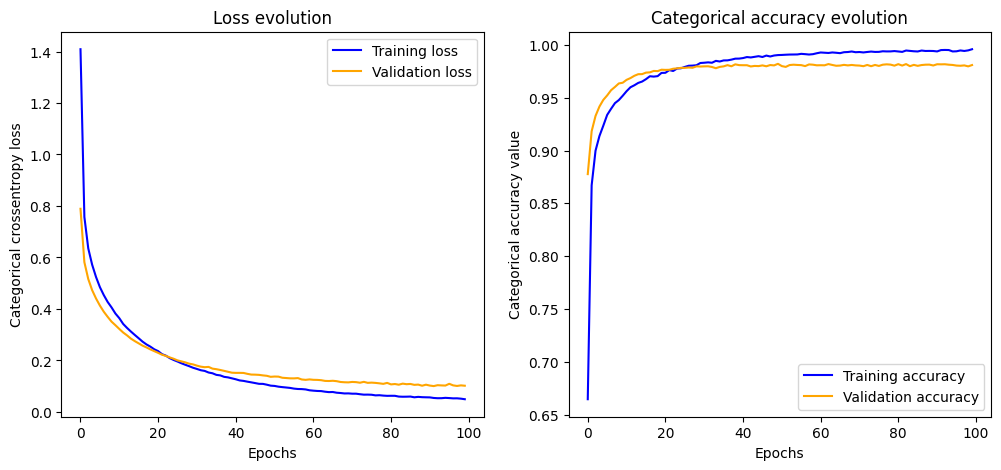

In [72]:
loss_evolution = learning.history['loss']
acc_evolution = learning.history['categorical_accuracy']
val_loss_evolution = learning.history['val_loss']
val_acc_evolution = learning.history['val_categorical_accuracy']

#PLOT THE EVOLUTION


plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(loss_evolution, color='blue', label='Training loss')
plt.plot(val_loss_evolution, color='orange', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Categorical crossentropy loss")
plt.title("Loss evolution")
plt.legend()
plt.subplot(122)
plt.plot(acc_evolution, color='blue', label='Training accuracy')
plt.plot(val_acc_evolution, color='orange', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Categorical accuracy value")
plt.title("Categorical accuracy evolution")
plt.legend()
plt.show()


### Predicting with your model

**Exercise**: Run the prediction on the test set

In [75]:
#TO DO

Y_pred = model.predict(X_test)
Y_pred_asLabel = np.argmax(Y_pred, axis=1)
test_accuracy = np.mean(Y_pred_classes == Y_test)
print(f"Test set accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test set accuracy: 98.00%


**Exercise**: Extract the predicted labels, that corresponds to the classes with highest predicted probabilities. The function np.argmax (with the right "axis") will be useful.

Number of wrong predictions: 238


Text(0, 0.5, 'Network output')

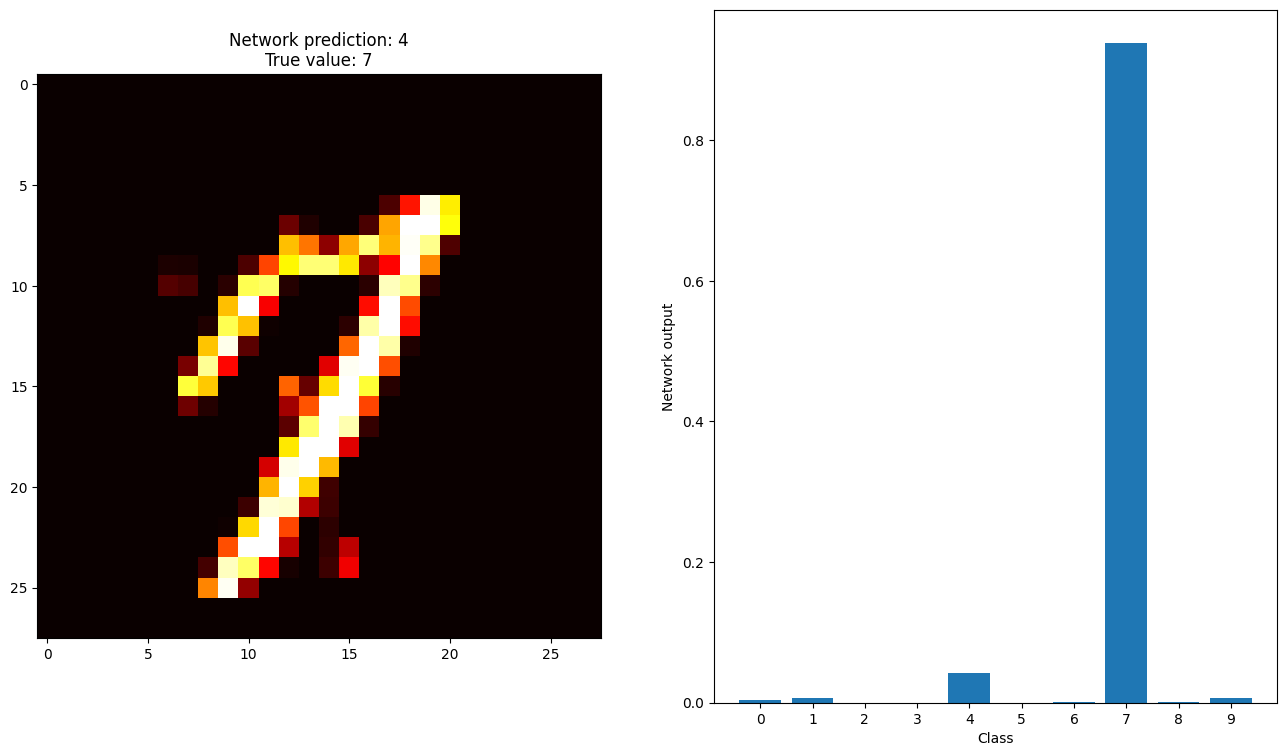

In [77]:
#TO DO
wrong_predictions = np.where(Y_pred_asLabels != Y_test)[0]
print(f"Number of wrong predictions: {len(wrong_predictions)}")

rand_wrong_index = np.random.choice(wrong_predictions)
r = rand_wrong_index

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Network prediction: " + str(Y_pred_asLabels[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


**Exercise**: Compute the accuracy on the test set.

In [ ]:
#TO DO

The following cell displays randomly some of the test examples and the associated predictions.

Text(0, 0.5, 'Network output')

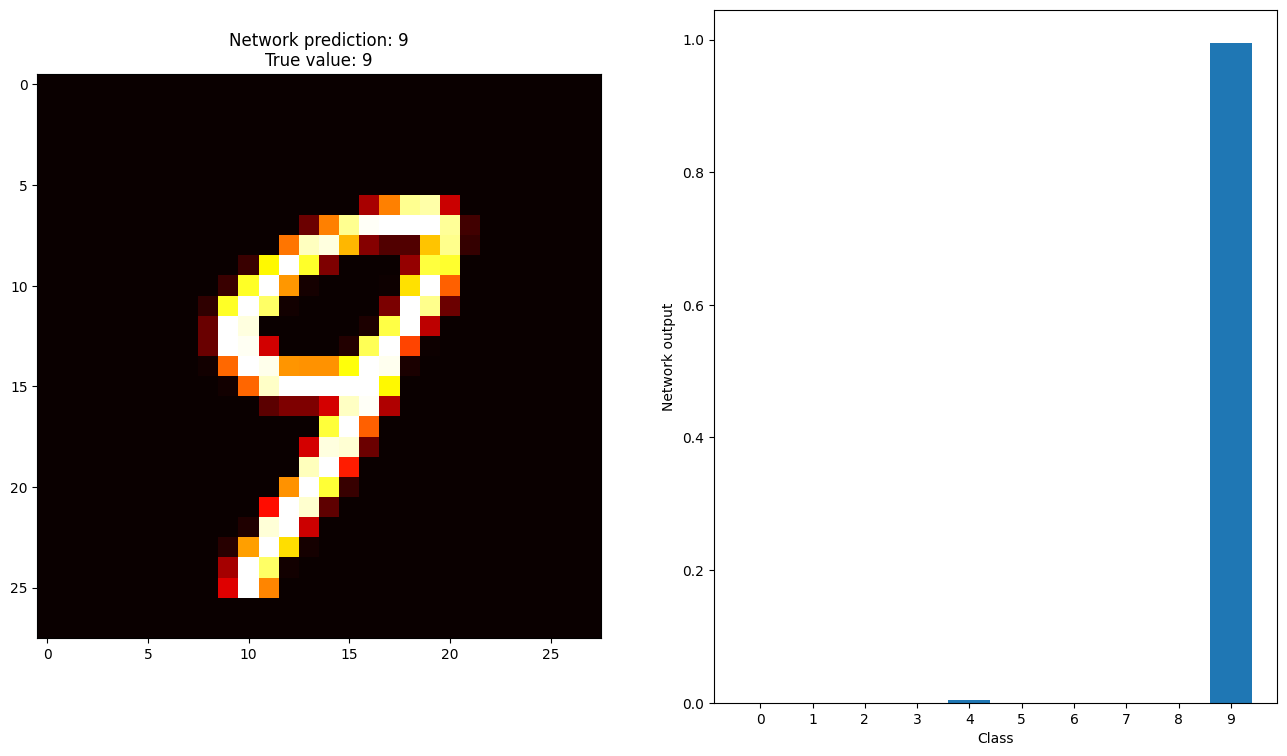

In [76]:
r = np.random.randint(X_test.shape[0])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Network prediction: " + str(Y_pred_asLabel[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


**Exercise**: Adapt the previous code to displays random wrong predictions of the network. The function np.where should be useful.

Number of wrong predictions: 238


TypeError: Invalid shape (28, 28, 1, 1) for image data

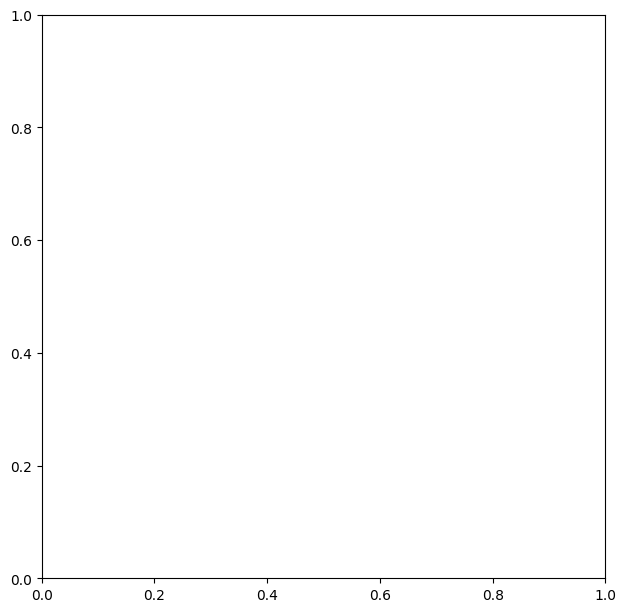

In [111]:
#TO DO
wrong_predictions = np.where(Y_pred_asLabels != Y_test)[0]
print(f"Number of wrong predictions: {len(wrong_predictions)}")

rand_wrong_index = np.random.choice(wrong_predictions)
r = rand_wrong_index

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:],cmap = "hot")
plt.title("Network prediction: " + str(Y_pred_asLabels[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


## Keras Convolutional model

We use now Convolutional Neural Network.

### New data format

**Exercise**: We will use 2D convolutional layers. This type of layer expects input with shape $n\times m \times c$ where $n$ and $m$ are the horizontal and vertical sizes of the image, and $c$ is the number of channels: thus we need 3 dimension in total. For instance, a RGD image consists in 2 channels ($c = 3$). In the MNIST case, the images are in grey-scale, thus, they only have one channel. However, the dimension of an example in X_train is (28,28), so 2D, and we must expand the number of dimension so that it becomes (28,28,1).

In the following cell, apply this transformation by using the function np.expand_dims, adding a dimension on the last axis (keyword axis = 3).

In [16]:
X_train = np.expand_dims(X_train, axis=3)

X_test = np.expand_dims(X_test, axis=3)

### Model creation with convolutional layers

**Exercise**: Create a Keras model with name "my_model".

**Specific instructions**:
- The first layers must be 2D convolutional layers: keras.layers.Conv2D. In argument, indicate the number of neurons (= number of filters). Some neurons should be enough, it is not necessary to use dozens of neurons. Then, you must indicate the filter size: some pixels should be enough. You can indicate the size such as (n,m) if you want rectangular filters, or only n if you want square filters. Finally, you can add an activation function ("relu" for instance).
- The first convolutional layer must contain the input_shape. Pay attention to the fact that we previously add a dimension.
- After each convolution layer, add a MaxPooling2D layers (keras.layers.MaxPooling2D) to reduce the size of the images. Indicate the size of the pooling (usually, we use 2 by default).
- Use only some convolutional layers (2 or 3 should be enough).
- After the convolutional part, flatten into a vector by using a Flatten layer (no argument)
- Finally, you can use Dense layers to complete the network, and the last layer must contain the right number of neurons and activation function.
- You can also add BatchNormalization or Dropout layer, or regularization if you want.

In [17]:
#TO DO

model = keras.Sequential()  
model.add(keras.layers.InputLayer(shape=(28,28,1)))
model.add(keras.layers.Conv2D(12, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(12, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu', kernel_regularizer= keras.regularizers.l2(1e-3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(100, activation='relu', kernel_regularizer= keras.regularizers.l2(1e-3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(output_dimensions, activation='softmax', kernel_regularizer= keras.regularizers.l2(1e-3)))


**Exercise**: Display your architecture by calling my_model.summary()

In [18]:
#TO DO
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 12)     │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 12)     │         1,308 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,438 (169.68 KB)

 Trainable params: 43,038 (168.12 KB)

 Non-trainable params: 400 (1.56 KB)

### Model compilation

**Exercise**: Compile your model and choose an optimizer. Use adapted loss function and metrics.

In [26]:
#TO DO
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['categorical_accuracy' ])

### Early stopping

**Exercise**: Define an early stopping procedure.

In [27]:
#TO DO
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

### Training

**Exercise**: Run the learning by using a validation set, mini-batches, early stopping... and store the learning history in a variable.

In [28]:
#TO DO

learning = model.fit(X_train,
                     Y_train_cat,
                     validation_split=0.2,
                     epochs=100,
                     batch_size=128,
                     shuffle=True,
                     callbacks=[early_stopping])

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - categorical_accuracy: 0.4119 - loss: 2.1594 - val_categorical_accuracy: 0.8945 - val_loss: 0.6602
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.8506 - loss: 0.7681 - val_categorical_accuracy: 0.9348 - val_loss: 0.4951
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9034 - loss: 0.5785 - val_categorical_accuracy: 0.9492 - val_loss: 0.4310
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - categorical_accuracy: 0.9263 - loss: 0.4940 - val_categorical_accuracy: 0.9583 - val_loss: 0.3851
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.9402 - loss: 0.4360 - val_categorical_accuracy: 0.9612 - val_loss: 0.3674
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.9504 - loss: 0.3949 - val_categorical_accuracy: 0.9682 - val_loss: 0.3314
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.95

**Verification**: The loss function should decrease and the accuracy should increase. Same thing for the validation loss.

**Exercise**: Plot the evolution of the loss function, and the evolution of the accuracy, for the training set and the validation set. 

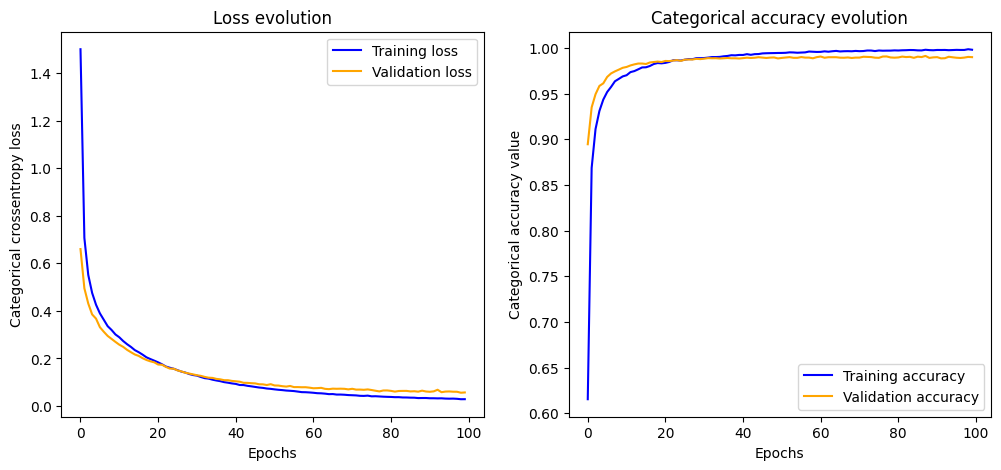

In [29]:
#TO DO
loss_evolution = learning.history['loss']
acc_evolution = learning.history['categorical_accuracy']
val_loss_evolution = learning.history['val_loss']
val_acc_evolution = learning.history['val_categorical_accuracy']



plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(loss_evolution, color='blue', label='Training loss')
plt.plot(val_loss_evolution, color='orange', label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Categorical crossentropy loss")
plt.title("Loss evolution")
plt.legend()
plt.subplot(122)
plt.plot(acc_evolution, color='blue', label='Training accuracy')
plt.plot(val_acc_evolution, color='orange', label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Categorical accuracy value")
plt.title("Categorical accuracy evolution")
plt.legend()
plt.show()



### Predicting with your model

**Exercise**: Run the prediction on the test set

In [30]:
#TO DO

Y_pred = model.predict(X_test)
Y_pred_asLabel = np.argmax(Y_pred, axis=1)
test_accuracy = np.mean(Y_pred_asLabel == Y_test)
print(f"Test set accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test set accuracy: 99.01%


**Exercise**: Extract the predicted labels, that corresponds to the classes with highest predicted probabilities. The function np.argmax (with the right "axis") will be useful.

**Exercise**: Compute the accuracy on the test set.

The following cell displays randomly some of the test examples and the associated predictions.

Text(0, 0.5, 'Network output')

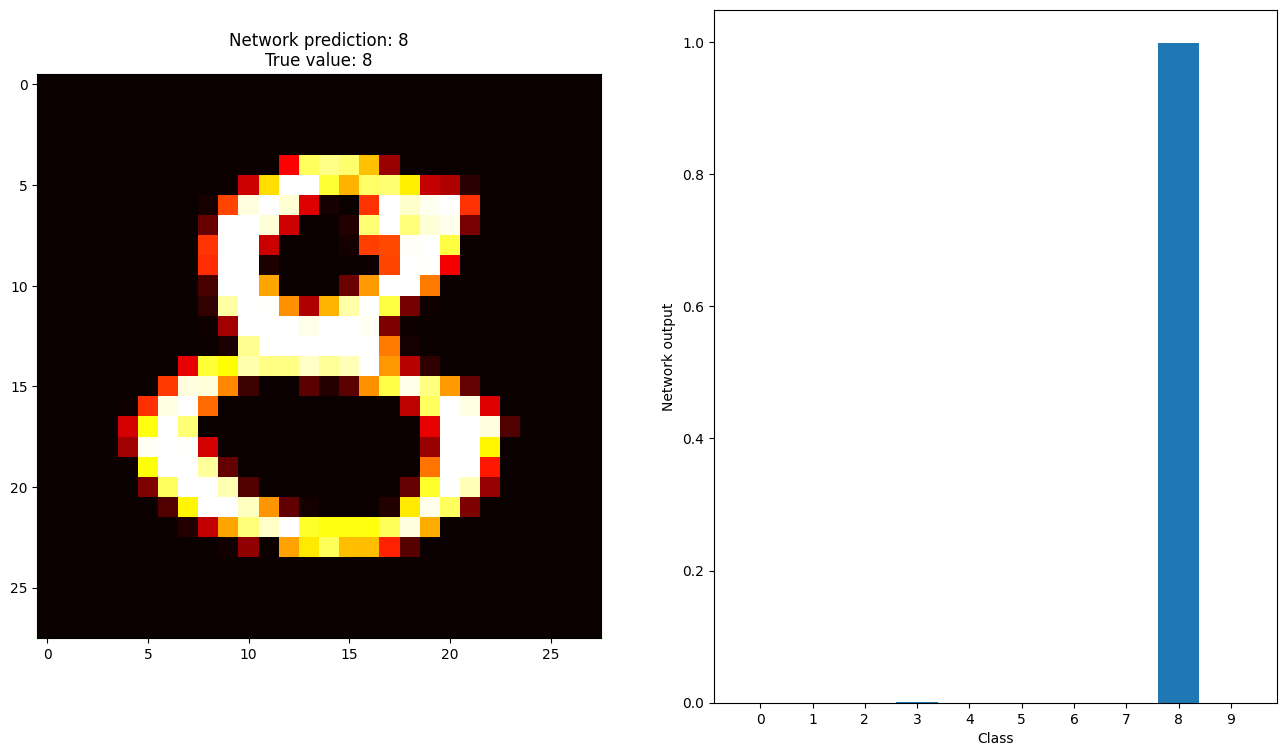

In [31]:
r = np.random.randint(X_test.shape[0])

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:,0],cmap = "hot")
plt.title("Network prediction: " + str(Y_pred_asLabel[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


**Exercise**: Adapt the previous code to displays random wrong predictions of the network. The function np.where should be useful.

Number of wrong predictions: 99


Text(0, 0.5, 'Network output')

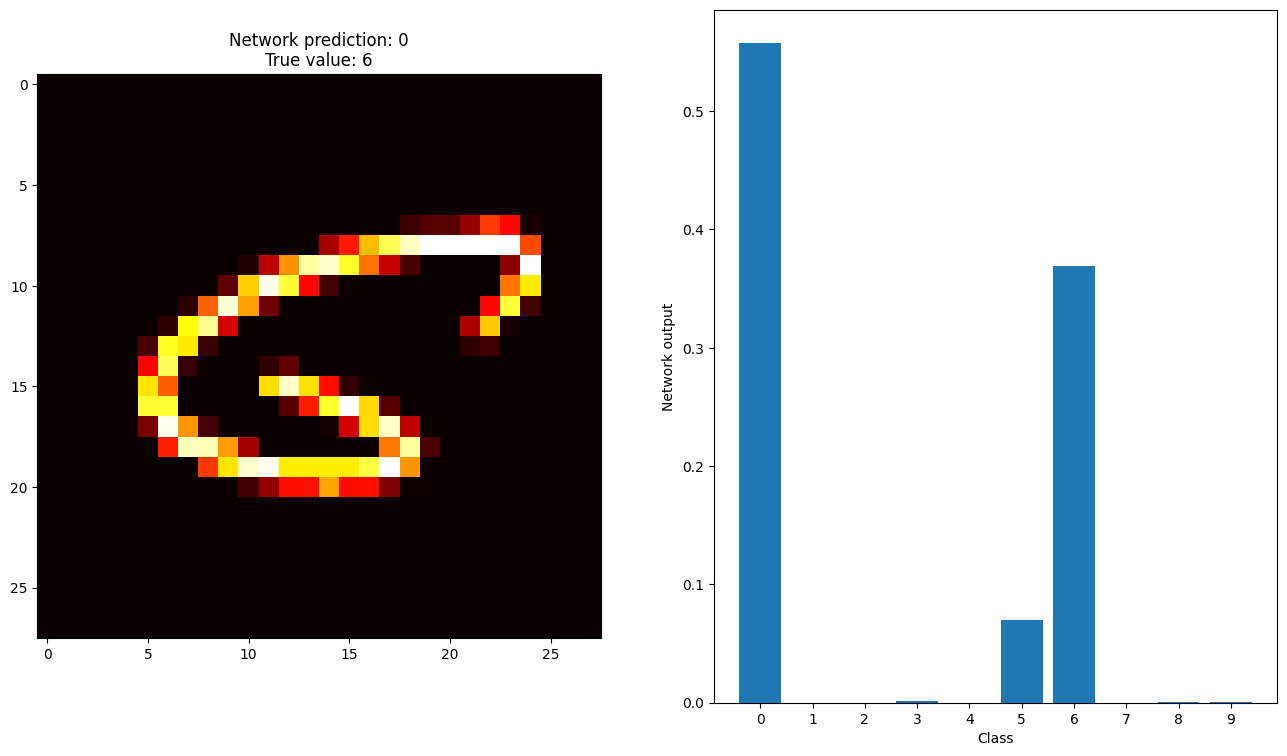

In [38]:
#TO DO
wrong_predictions = np.where(Y_pred_asLabel != Y_test)[0]
print(f"Number of wrong predictions: {len(wrong_predictions)}")

rand_wrong_index = np.random.choice(wrong_predictions)
r = rand_wrong_index

figure = plt.figure(figsize = (16,9))

ax1 = plt.subplot(121)
ax1.imshow(X_test[r,:,:,0],cmap = "hot")
plt.title("Network prediction: " + str(Y_pred_asLabel[r]) + "\nTrue value: " + str(Y_test[r]))

ax2 = plt.subplot(122)
ax2.bar(np.arange(10),height = Y_pred[r],tick_label = np.arange(10))
plt.xlabel("Class")
plt.ylabel("Network output")


In [ ]:
import os
import shutil

save_path = './mnist_CNN.keras'
model.save(save_path)
#import model file to dropbox or google drive manually
!curl --upload-file




curl: (7) Failed to connect to transfer.sh port 443 after 176 ms: Connection refused
